# Exercícios - Estatística

In [1]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy import stats
import statistics
from scipy.stats import norm

### Questão 1

Uma relação bem importante entre uma população e uma amostra, é que uma amostra pode ser significativa daquela população (ou seja, podemos inferir que a média e variância da amostra será bem próximo do valor real da população), isto quando essa amostra for grande o suficiente para isso. Vamos fazer algumas simulações utilizando o _Python_ para testar esses conceitos, resolvendo os itens a seguir:

__A)__ Crie uma lista com número aleatórios entre 20 e 50 e que essa lista contenha 1 milhão de elementos;

__B)__ Calcule a média e a variância para essa lista;

__C)__ Faça amostra aleatórias de diversos tamanhos (10, 100, 1.000 e 10.000 elementos) e calcule as mesmas métricas que o item anterior, para avaliar o conceito proposto no enunciado

In [2]:
from statistics import variance
pop = np.random.randint(low = 20,high=50,size=1000000)
print('Media :',np.mean(pop))
print('Variança :',np.std(pop)**2)
print('Variança :',np.var(pop, dtype = np.float32))

Media : 34.492802
Variança : 74.98580618879599
Variança : 74.98582


In [3]:
#amostra_10 
amostra_10 = np.random.choice(pop, size=10)
print('Media :',np.mean(amostra_10))
print('Variança :',np.std(amostra_10)**2)
print('Variança :',np.var(amostra_10, dtype = np.float32))

Media : 32.8
Variança : 39.36000000000001
Variança : 39.359997


In [4]:
#amostra_100 
amostra_100 = np.random.choice(pop, size=100)
print('Media :',np.mean(amostra_100))
print('Variança :',np.std(amostra_100)**2)
print('Variança :',np.var(amostra_100, dtype = np.float32))

Media : 34.07
Variança : 84.3251
Variança : 84.325096


In [5]:
#amostra_1000 
amostra_1000 = np.random.choice(pop, size=1000)
print('Media :',np.mean(amostra_1000))
print('Variança :',np.std(amostra_1000)**2)
print('Variança :',np.var(amostra_1000, dtype = np.float32))

Media : 34.941
Variança : 73.36751900000002
Variança : 73.367516


In [6]:
#amostra_10000 
amostra_10000 = np.random.choice(pop, size=10000)
print('Media :',np.mean(amostra_10000))
print('Variança :',np.std(amostra_10000)**2)
print('Variança :',np.var(amostra_10000, dtype = np.float32))

Media : 34.4915
Variança : 75.77152775000002
Variança : 75.77152


In [7]:
pop_data = pd.DataFrame({
    'Amostra': np.random.choice(pop, size=2000),
    'type': 'Data',
})

amostra_10_data  = pd.DataFrame({
    'Amostra': [pop_data['Amostra'].sample(10).mean() for _ in range(2000)],
    'type': 'Mean of 10',
})

amostra_100_data  = pd.DataFrame({
    'Amostra': [pop_data['Amostra'].sample(100).mean() for _ in range(2000)],
    'type': 'Mean of 100',
})

amostra_1000_data  = pd.DataFrame({
    'Amostra': [pop_data['Amostra'].sample(1000).mean() for _ in range(2000)],
    'type': 'Mean of 1000',
})




results = pd.concat([pop_data, amostra_10_data, amostra_100_data, amostra_1000_data])
results.reset_index(drop=True, inplace=True)
results

,Amostra,type
0,32.000,Data
1,20.000,Data
2,49.000,Data
3,45.000,Data
4,47.000,Data
...,...,...
7995,34.949,Mean of 1000
7996,35.010,Mean of 1000
7997,35.055,Mean of 1000
7998,34.892,Mean of 1000


In [8]:
results.groupby(['type'])[['Amostra']].mean()

,Amostra
type,
Data,34.916500
Mean of 10,34.941850
Mean of 100,34.919530
Mean of 1000,34.919259


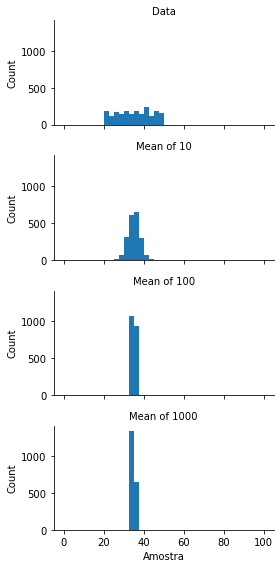

In [9]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'Amostra', range=[0, 100], bins=40)
g.set_axis_labels('Amostra', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

### Questão 2

Neste exercício vamos demonstrar a importância de uma amostragem estratificada quando temos grupos significantes dentro da população. Faça os seguintes itens:

__A)__ Crie 3 listas de números aleatórios sendo elas:
    - uma lista com números aleatórios entre 40 e 50 contendo 10.000 elementos;
    - uma lista com números aleatórios entre 10 e 20 contendo 6.000 elementos;
    - uma lista com números aleatórios entre 80 e 90 contendo 4.000 elementos.
    
__B)__ Calcule a média e a variância para cada uma das 3 listas;

__C)__ Calcule a média e a variância para a população, onde a população seja as 3 listas juntas;

__Dica.:__ Neste caso, temos que trabalhar com média e variância ponderada!

__D)__ Una as 3 listas em uma só e retire uma amostra de 1% da lista resultante. Calcule a média e a variância para esta amostra;

__E)__ Por fim, faça uma amostra estratificada da seguinte forma: faça uma amostra aleatória de 1% de cada uma das 3 listas e em seguida calcule a média e a variância para a amostra estratificada (será necessário utilizar a média e variância ponderada!).

__F)__ Compare o resultado das métricas para a amostra e a amostra estratificada com o valor das métricas da população.

In [10]:
# a)
pop1 = np.random.randint(low = 40,high=50,size=10000)
pop2 = np.random.randint(low = 10,high=20,size= 6000)
pop3 = np.random.randint(low = 80,high=90,size= 4000)

In [11]:
pop1

array([45, 44, 42, ..., 44, 45, 46])

In [12]:
# b)

In [13]:
print('Media1 :',np.mean(pop1))
print('Variança1 :',np.std(pop1)**2)
print('Variança1 :',np.var(pop1, dtype = np.float32))

Media1 : 44.48
Variança1 : 8.141400000000003
Variança1 : 8.1414


In [14]:
print('Media2 :',np.mean(pop2))
print('Variança2 :',np.std(pop2)**2)
print('Variança2 :',np.var(pop2, dtype = np.float32))

Media2 : 14.514833333333334
Variança2 : 8.25344663888889
Variança2 : 8.253447


In [15]:
print('Media3 :',np.mean(pop3))
print('Variança3 :',np.std(pop3)**2)
print('Variança3 :',np.var(pop3, dtype = np.float32))

Media3 : 84.4305
Variança3 : 8.33616975
Variança3 : 8.33617


In [16]:
# c)

In [17]:
results = pd.concat([pd.DataFrame({'value': pop1 , 'wt' : [.5]*10000}, index = ['05']*10000), 
                     pd.DataFrame({'value': pop2 , 'wt' : [.3]*6000}, index = ['03']*6000), 
                     pd.DataFrame({'value': pop3 , 'wt' : [.2]*4000}, index = ['02']*4000)])

In [18]:
results

,value,wt
05,45,0.5
05,44,0.5
05,42,0.5
05,43,0.5
05,47,0.5
...,...,...
02,83,0.2
02,84,0.2
02,83,0.2
02,88,0.2


In [19]:
#media ponderada
def weighted_average(dataframe, value, weight):
    val = dataframe[value]
    wt = dataframe[weight]
    return (val * wt).sum() / wt.sum()
 

In [20]:
weighted_average(results, 'value', 'wt')

41.58830263157895

In [21]:
from statsmodels.stats.weightstats import DescrStatsW

In [51]:
#Variança ponderada
DescrStatsW(data=results['value'], weights=results['wt'], ddof=1).var

380.5442479410378

In [23]:
# c)

In [24]:
percent_1 = results.sample(200)
percent_1['value'].mean()

41.86

In [25]:
#Media ponderada
weighted_average(percent_1, 'value', 'wt')

40.55774278215224

In [26]:
np.var(list(percent_1['value']), dtype = np.float64)

579.4104000000001

In [27]:
#Variança ponderada
DescrStatsW(data=percent_1['value'], weights=percent_1['wt'], ddof=1).var

378.63026504998044

In [28]:
DescrStatsW(data=percent_1['value'], ddof=1).var

582.3220100502512

In [29]:
# d)

### Questão 3

 Uma máquina de sorvete está regulada de modo a servir uma média de 120g por casquinha. Se a quantidade servida por casquinha seguir uma distribuição normal com desvio padrão de 18g, determine a porcentagem de casquinhas que conterão mais de 150g de sorvete.

In [30]:
1 - stats.norm.cdf(150, loc=120, scale=18)

0.047790352272814696

### Questão 4

O peso médio de 500 estudantes do sexo masculino de uma determinada universidade é 71 Kg e o desvio padrão é 5,3 Kg. Admitindo que os pesos são normalmente distribuídos, determine a porcentagem de estudantes que pesam entre 65 e 72,5 kg

In [31]:
stats.norm.cdf(72.5, loc=71, scale=5.3) - stats.norm.cdf(65, loc=73, scale=5.3)

0.5458248535031971

### Questão 5

Uma fábrica anuncia que o índice de cafeína em um refrigerante de uma dada marca é igual a 20 mg por lata. Um laboratório realiza 20 análises do índice obtendo: 22, 19, 21, 22, 20, 18, 27, 20, 21, 19, 20, 22, 17, 20, 21,18, 25, 16, 20, 21. Sabe-se que o índice de cafeína do refrigerante dessa marca se distribui normalmente com variância 4 mg$^2$. Pode-se aceitar a afirmação do fabricante, ao nível de 5%?

In [32]:
df = pd.DataFrame({'mg' : [22,19,21,22,20,18,27,20,21,19,20,22,17,20,21,18,25,16,20,21]})

In [33]:
n = len(df)

In [34]:
df

,mg
0,22
1,19
2,21
3,22
4,20
5,18
6,27
7,20
8,21
9,19


In [35]:
media_amostra = df.mean()
media_amostra

mg    20.45
dtype: float64

In [36]:
desvio_amostra = df.std()
desvio_amostra

mg    2.523052
dtype: float64

In [37]:
n = 20
graus_de_liberdade = n - 1
u0 = 20
sigma = np.sqrt(4)
erro = sigma/np.sqrt(n)

In [38]:
confianca = 0.95
alpha = 0.05

In [39]:
from scipy.stats import t as t_student

In [40]:
t_alpha = t_student.ppf(alpha/2, df=19)
t_alpha

-2.0930240544082634

In [41]:
t = (media_amostra - u0) / (desvio_amostra/np.sqrt(n))
t

mg    0.79763
dtype: float64

In [42]:
t <= t_alpha

mg    False
dtype: bool

In [43]:
pvalue = t_student.sf(t, df=graus_de_liberdade)*2
pvalue

#pvalue = t_student.cdf(-t, df=graus_de_liberdade)*2
#pvalue

array([0.43494125])

In [44]:
pvalue > alpha

array([ True])

In [45]:
teste = DescrStatsW(df['mg'])

In [46]:
teste.ttest_mean(value=u0, alternative='two-sided')

(0.7976298084234648, 0.43494125482486135, 19.0)

In [47]:
teste.ttest_mean(value=u0, alternative='larger')[1]*2

0.43494125482486135

In [48]:
maximo = t_student.ppf(1-alpha/2, loc=20, scale=erro, df=19)
maximo

20.93602881283982

In [49]:
minimo = t_student.ppf(alpha/2, loc=20, scale=erro, df=19)
minimo

19.06397118716018

In [50]:
minimo < float(media_amostra) and float(media_amostra) < maximo

True